# MNIST Klassifikation
In diesem Notebook erstellen wir ein einfaches Neuronales Netzwerk mithilfe von pytorch um den MNIST Datensatz zu Klassifizieren. Dabei gehen wir entsprechend der [good practice des Deep Learning nach Kaparthy](https://karpathy.github.io/2019/04/25/recipe/) vor.

1. Data Exploration
2. Model & Traininsloop erstellen
3. Evaluieren
4. Overfitten
5. Regularisieren
6. Optimieren

## 1. Data Exploration

Als erstes werden wir die Daten erkunden, um wertvolle Erkenntnisse aus den vorliegenden Daten zu gewinnen. Dabei werden wir verschiedene Analysetechniken und Visualisierungsmethoden einsetzen, um ein umfassendes Verständnis des Datensatzes zu entwickeln. Ziel ist es, Muster, Trends und Zusammenhänge innerhalb der Daten zu identifizieren und darauf aufbauend fundierte Entscheidungen treffen zu können, zB welche Informationen den Daten entnommen werden können und welches Modell sich dazu eignet.

Zunächst laden wir die standardmässig verwendeten Module und den Datensatz.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# Lade den MNIST-Datensatz
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

Die Inputdaten befinden sich nun in


```
mnist.data
```
 Die Klassenlabel in

 ```
 mnist.target
 ```


### Aufgabe 1.1
### Welches Format haben die Daten?
Wir betrachten das Format der Daten. Bestimmen Sie dazu
1. die Grösse des Datensatzes: N_data
2. die Dimension der einzelnen Input-Daten: size_input
3. den Container des Input Daten: container_input
4. den Input datentyp: dtype_input
5. den Datentyp der Label: dtype_output
6. den Wertebereich der Input-Daten: mini, maxi
7. die möglichen Outputwerte: labels_list

In [ ]:
import numpy as np

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# Grösse des Datensatzes
N_data, size_input = mnist.data.shape
# Input container
container_input = type(mnist.data[0])
# Datentypen
dtype_input = mnist.data.dtype
dtype_output = type(mnist.target[0])
# Wertebereich
mini, maxi = mnist.data.min(), mnist.data.max()
labels_list = np.unique(mnist.target)

##############################################
##############################################
##############################################



print("Format des Datensatzes:")
print("Anzahl Datenpunkte:", N_data)
print("Dimension der Input Daten:", size_input)
print("Input Container:", container_input)
print("Input Datentyp:", dtype_input)
print("Output Datentyp:", dtype_output)
print("Input Wertebereich:", f"[{mini},{maxi}]")
print("Output Werte:", f"{labels_list}")

Format des Datensatzes:
Anzahl Datenpunkte: 70000
Dimension der Input Daten: 784
Input Container: <class 'numpy.ndarray'>
Input Datentyp: int64
Output Datentyp: <class 'str'>
Input Wertebereich: [0,255]
Output Werte: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Welche Daten enthält der Datensatz?

Nun betrachten wir ein paar Datenbeispiele. Bei den Daten handelt es sich um Bilder mit einem string label. Wir plotten ein paar dieser Bilder zusammen mit deren Label.

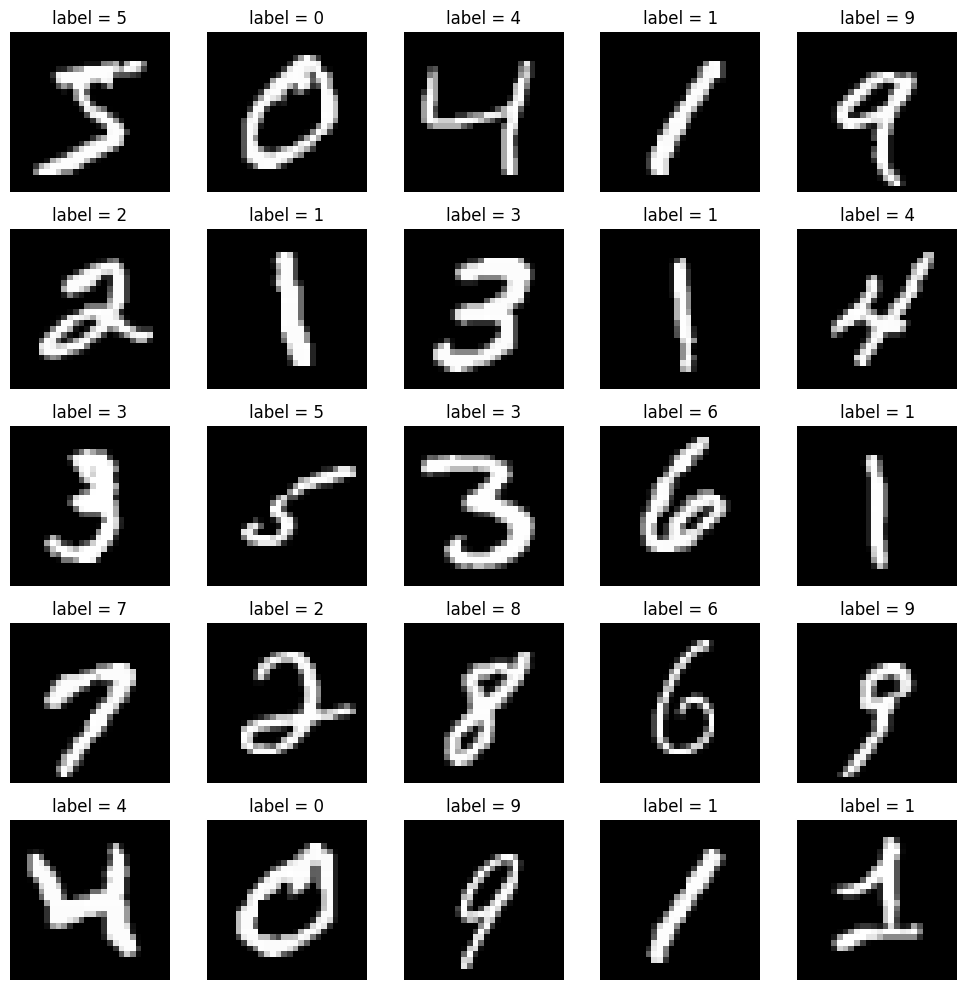

In [ ]:
import matplotlib.pyplot as plt

# Plot 25 example images with labels as titles
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"label = {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()



Bei den Daten handelt es sich um Schwarz-Weiss Bilder von handgeschriebenen Ziffern. Das Label gibt an, welche Ziffer im Bild geschrieben steht.

### Aufgabe 1.2
### Welche Klassen gibt es und wie sind diese Verteilt?
Nun betrachten wir die Verteilung der Klassen. Berechnen und plotten Sie dazu das Histogram der Label.

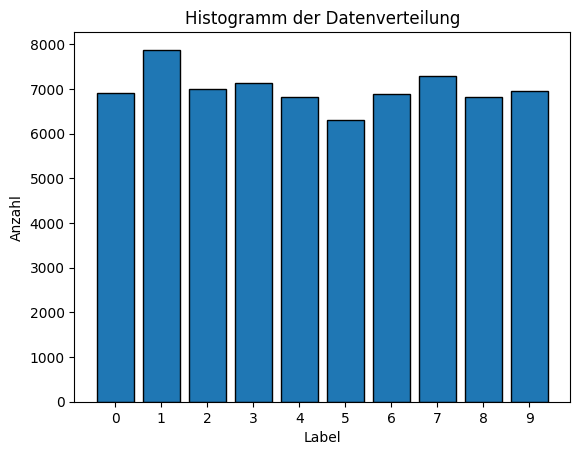

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# NumPy Histogramm-Berechnung
counts = np.bincount(mnist.target.astype(int))

##############################################
##############################################
##############################################


# Histogramm-Plot
plt.bar(labels_list, counts, edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Anzahl')
plt.title('Histogramm der Datenverteilung')
plt.show()



Die Daten sind in etwa gleichmässig verteilt und bedürfen diesbezüglich keiner weiteren Bearbeitung.
Wenn die Klassen ungleichmässig verteilt sind, beeinflusst das die Performance eines darauf trainierten Neuronalen Netzes.

### Aufgabe 1.3
### Wie machen wir die Klassen dem Model verständlich?
Die Label Information liegt als String vor. Ein Neuronales Netz arbeitet jedoch in aller Regel nur mit Floats.
Ein einfaches übersetzen der Strings in die Floatwerte 0 - 9 hätte zur Folge, dass zB ein Output von 4 näher am Zielwert 5 läge als ein Output von 1. Die 4 ist der 5 aber nicht ähnlicher als die 1.
Es ist daher sinnvoll, jedes mögliche Label durch einen eigenen Floatwert 0 - 1 darzustellen, zB 3 -> [0,0,0,1,0,0,0,0,0,0].
Dieser Vorgang heisst **One-Hot-Encoding** und sorgt für die saubere Trennung der Label. Ausserdem erlaubt dieses Vorgehen mit Labeln zu arbeiten, die keine Zahlenwerte sind, wie zB "Hund", "Katze", "Maus".

Überführen Sie nun die Targetlabel in das One-Hot-Encoding Format.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# One-Hot-Encoding der Labels
encoder = OneHotEncoder()
labels = encoder.fit_transform(mnist.target.reshape(-1, 1))

##############################################
##############################################
##############################################


print("Shape der One-Hot-Encdoded Labels:", labels.shape)

Shape der One-Hot-Encdoded Labels: (70000, 10)


Die shape der labels sollte nun (70000, 10) sein.

### Aufgabe 1.4
### Welche Skalierung der Daten ist sinnvoll?
Die Input Werte sind zwar schon im float Format, allerdings skalieren Sie von 0-255. Die Erfahrung zeigt, dass Neuronale Netze am besten mit Werten zwischen -1 und 1 bzw zwischen 0 und 1 arbeiten.

Reskalieren Sie die Input Daten mithilfe des Min-Max Scaling:
$$scaled\_data = \frac{{data - \min(data)}}{{\max(data) - \min(data)}} \cdot 2 - 1
$$

In [ ]:
import numpy as np

# Skalierung der Bilddaten auf [-1, 1]
mini, maxi = np.min(mnist.data), np.max(mnist.data)
print("Min/Max vor Skalierung:", mini, maxi)

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

scaled_data = 2*(mnist.data.astype(float) - mini) / (maxi - mini) - 1

##############################################
##############################################
##############################################

print("Min/Max nach Skalierung:", np.min(scaled_data), np.max(scaled_data))


Min/Max vor Skalierung: 0 255
Min/Max nach Skalierung: -1.0 1.0


## 2. Modell & Trainingsloop erstellen
In diesem Abschnitt erstellen wir das Modell und die Trainingsloop. Damit definieren wir das Ziel (die zu minimierende Loss Funktion) und den Algorithmus (Model), um dieses Ziel zu erreichen.

Stellen Sie zuerst sicher, dass Sie Zugriff auf GPU ressourcen haben, auf denen die Berechnungen bis zu 20x schneller laufen.

Zum aktivieren in Google Colab:

Runtime -> Change Runtime

Hardware Accelerator -> GPU

In [ ]:
import torch

# Prüfen, ob GPU verfügbar ist. Sonst Berechnung auf CPU. Nur NVIDIA GPUs mit CUDA werden unterstützt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device, " (= cuda ?)")

cuda  (= cuda ?)


Um auf der GPU zu rechnen, müssen sich sowohl das Model als auch die Trainingsdaten im GPU Speicher befinden. Das erreicht man mit
```
model.to(device)
```
bzw
```
data = data.to(device)
```

Zuerst laden wir den Datensatz als Tensor, mit dem das Model rechnen wird. Wir unterteilen den Datensatz in Trainings- und Testdaten. Dabei wird has Modell so trainiert, dass die Trainingsdaten möglichst gut approximiert werden. Die Performance des fertig trainierten Modells auf neue Daten wird dann mit dem Testdatensatz abgeschätzt.

In [ ]:
from torchvision import datasets, transforms

# Laden des MNIST-Datensatzes als pytorch tensoren
transform = transforms.ToTensor()
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)


### Aufgabe 2.1

Hier definieren wir das Modell.
Als Klassifizierungsmodell nehmen wir ein einfaches Multi-Layer Perceptron (MLP), welches zu einem gegebenen MNIST Bild die Wahrscheinlichkeit ausgibt, mit der es die Ziffern 0-9 darstellt. Der höchste Score entspricht also der zugeordneten Ziffer.
Erstellen Sie ein MLP mit den folgenden Spezifikationen:
* Input: B/W-Bilder mit 28x28 pixeln.
* 3 hidden layer (fc1 - fc3, fully connected / linear): 64 Knoten, Aktivierung: ReLU
* output layer (fc4): 10 Knoten, Aktivierung: keine






In [ ]:
from torch import nn

# Definieren des Models


class MLP(nn.Module):
    def __init__(self):
        """
        Multi-Layer Perceptron (MLP) Neural Network.

        This class represents a simple MLP model with 4 fully connected layers.
        The input to the network should have a shape of (N_batch, 28*28), where N_batch is the batch size
        and 28*28 is the flattened input image size (28x28 pixels).

        The network architecture:
        - Input layer: Fully connected layer with 64 output units and ReLU activation.
        - Hidden layers: Two fully connected layers with 64 output units and ReLU activation for each.
        - Output layer: Fully connected layer with 10 output units (representing 10 classes).

        The forward() method defines how the input tensor flows through the layers of the network.

        Example usage:
        >>> model = MLP()
        >>> input_data = torch.randn(32, 28*28)  # Assuming batch size of 32
        >>> output = model(input_data)

        """
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.relu1 = nn.ReLU()

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)

##############################################
##############################################
##############################################

    def forward(self, x):
        x = x.view(x.size(0), -1)  # make sure shape is (N_batch,N_pixel)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x



'''
# Alternative methode, die nicht einfach erlaubt den output jedes layers einzusehen


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # make sure shape is (N_batch,N_pixel)
        x = self.model(x)
        return x




# Das selbe Model koennen wir auch kurz direkt definieren (ausgenommen das reshaping im forward)

model = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
'''
model = MLP()

### Aufgabe 2.2
Nun erstellen wir die Trainingsloop, in der das Modell einmal auf allen gegebenen Daten trainiert wird.
Vervollständigen Sie die folgende Trainingsloop, indem sie mit dem  model die Vorhersage berechnen und mithilfe der *criterion* funktion den loss berechnen, der die Vorhersage mit den tatsächlichen Labeln vergleicht.

Nachdem der Loss berechnet wurde, können damit die Gradienten für das Parameterupdate im Backward-Prozess berechnet werden:

```
loss.backward()
```

Die entsprechenden Updates der Gewichte werden dann mit dem gewählten optimizer Algorithmus angewendet:
```
optimizer.step()
```


Im Deep Learning sind die Datensätze zu gross, als dass ein Model auf allen Daten gleichzeitig trainieren könnte. Deswegen verwenden wir einen Dataloader, der den Datensatz in viele kleine Bündel (batches) aufteilt, die dann eins nach dem anderen geladen und das Modell darauf trainiert wird. Die Reihenfolge der Daten sollte während des Trainings in jeder Epoche zufällig gewählt werden.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm


# Trainingsloop
def train(model: nn.Module,
          criterion: nn.Module,
          optimizer: optim.Optimizer,
          data_loader: DataLoader,
          show_progress: bool = True) -> None:
    """
    Train the given model using the provided data_loader and optimization parameters.

    Args:
        model (nn.Module): The neural network model to be trained.
        criterion: The loss function used for optimization.
        optimizer: The optimization algorithm (e.g., SGD, Adam) for updating model parameters.
        data_loader (DataLoader): The DataLoader providing the training data in batches.
        show_progress (bool, optional): If True, show a progress bar during training. Default is True.

    Returns:
        None

    Example usage:
        >>> model = MLP()
        >>> criterion = nn.CrossEntropyLoss()
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        >>> train(model, criterion, optimizer, train_data_loader, show_progress=True)
    """
    model.train() # make sure model is in training mode
    for images, labels in tqdm(data_loader, desc="Train", disable=not show_progress):
        images = images.to(device)
        labels = labels.to(device)

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

        predictions = model(images)
        loss = criterion(predictions, labels)

##############################################
##############################################
##############################################


        optimizer.zero_grad() # remove all gradients computed before
        loss.backward()
        optimizer.step()

Um den Trainingsprozess nachzuverfolgen, betrachten wir die Entwicklung des Loss über die Epochen hinweg, sowohl für das Trainings als auch das Testset.
Um den Stand des Models nach einer Trainingsepoche festzustellen, wird der Loss idealerweise nach beenden des Trainings auf dem gesamten Test oder Trainingsdatensatz berechnet. In der Praxis wird um Ressourcen zu sparen der Trainingloss meist schon während des Trainings gesammelt, was allerdings keine saubere Bewertung der Performance nach der Trainingsepoche ist. Da die Performance aber massgeblich auf dem Testset ermittelt wird, ist dieser Trade-Off berechtigt. Allerdings gilt zu beachten, dass der Loss in diesem Fall nicht stetig sinkt.

Wenn kein Training stattfindet, braucht der Gradient für das Parameterupdate nicht berechnet werden, was einen Grossteil der Rechenressourcen ausmacht.
Mit *torch.no_grad()* kann diese Berechnung unterbunden und Ressourcen geschont werden.

In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader

# Berechnung des Losses auf einem Dataset, ohne Training des Models
def compute_average_loss(model: nn.Module,
                         criterion: nn.Module,
                         data_loader: DataLoader,
                         show_progress: bool = True) -> float:
    """
    Compute the average loss on the given dataset using the provided model and loss function.

    Args:
        model (nn.Module): The neural network model used for computing the loss.
        criterion (nn.Module): The loss function used for calculating the loss.
        data_loader (DataLoader): The DataLoader providing the dataset in batches.
        show_progress (bool, optional): If True, show a progress bar during computation. Default is True.

    Returns:
        float: The average loss per image in the dataset.

    Example usage:
        >>> model = MLP()
        >>> criterion = nn.CrossEntropyLoss()
        >>> average_loss = compute_average_loss(model, criterion, validation_data_loader, show_progress=True)
    """
    model.eval() # put model in evaluation mode, where it works as intended for its application
    total_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc="Compute Loss", disable=not show_progress):
            images = images.to(device)
            labels = labels.to(device)

            predictions = model(images)
            loss = criterion(predictions, labels)

            total_loss += loss.item() * images.size(0)  # loss.item() gibt den floatwert des losses aus. loss ist noch ein tensor
            total_samples += images.size(0)

    average_loss = total_loss / total_samples # average loss per image
    return average_loss

### Aufgabe 2.3

Nun testen wir Model und Trainingsloop indem wir für zwei Epochen trainieren um zu testen, ob der Trainingsloss sich verringert.
Vervollständigen Sie den Code, indem Sie die Loss Funktion *criterion*, den *optimizer* Algorithmus sowie den *Dataloader* fürs Training definieren.

Verwenden Sie Cross Entropy loss, den Adam Optimizer mit Defaultwerten, und einen Dataloader mit batchsize 256, der die Trainingsdaten in jedem durchlauf neu mischt.

In [ ]:
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader


# Testen des Modells und des Trainingsloops
model = MLP()
model.to(device)

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
training_loader = DataLoader(training_data, batch_size=256, shuffle=True)

##############################################
##############################################
##############################################

for i in range(2):  # Trainieren für 2 Epochen
    train(model, criterion, optimizer, training_loader)
    loss = compute_average_loss(model, criterion, training_loader)
    print(f"\nepoch {i}: {loss:.4f}\n")

Der Loss sollte mit jeder Trainingsepoche sinken

## 3. Evaluieren
In diesem Abschnitt erstellen wir eine Methode zur Bewertung des Modells.
Um die Leistung eines Modells zu bewerten, muss eine passende Metrik gewählt werden, welche die Erfüllung des Ziels nachvollziehbar misst.


In der Klassifikation ist die naheliegendste Metrik die Accuracy, welche den Anteil korrekter Klassifikationen zeigt

$$\text{Accuracy} = \frac{\text{Anzahl korrekter Klassifizierungen}}{\text{Anzahl Datenpunkte}}$$

Allerdings ist die Accuracy mit Vorsicht zu geniessen, insbesondere bei unbalancierten Datensätzen. Beispiel: 90% Klasse 1, 10% Klasse 0. Model sagt immer 1 und bekommt damit 90% accuracy.
Ausserdem liefert diese Metrik bei mehreren Klassen keine Einsicht, welche Klassen problematischer sind als andere.


Die Alternative dazu ist die Konfusionsmatrix, welche eine genauere Darstellung über die korrekte Zuordnung erlaubt.

![Konfusionsmatrix](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

Aus Precision, dem Anteil richtiger Daten die erkannt wurden, und Recall, dem Anteil erkannter Daten die tatsächlich richtig sind, lässt sich der F1-score berechnen, welcher beide Aspekte gleichermassen berücksichtigt

$$ F1 = 2\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Alle vier Grössen können Werte zwischen 0 und 1 bzw 0 % und 100 % annehmen, wobei 100 % ein perfektes Ergebnis darstellt.


Berechnen Sie mit den richtigen sowie den verhorgesagten Labeln den *F1-Score* sowie die *Konfusionsmatrix*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, f1_score

def evaluate(model: nn.Module,
             data_loader: DataLoader,
             show_progress: bool = True) -> tuple:
    """
    Evaluate the given model on the provided data_loader and compute the confusion matrix and F1 score.

    Args:
        model (nn.Module): The neural network model to be evaluated.
        data_loader (DataLoader): The DataLoader providing the evaluation data in batches.
        show_progress (bool, optional): If True, show a progress bar during evaluation. Default is True.

    Returns:
        tuple: A tuple containing the confusion matrix (as a 2D array) and the F1 score (as a float).

    Example usage:
        >>> model = MLP()
        >>> test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
        >>> conf_mat, f1 = evaluate(model, test_loader)
        >>> print(f'F1 score: {f1}')
        >>> plot_confusion_matrix(conf_mat)
    """
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc="Evaluate", disable=not show_progress):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.append(labels.cpu())
            all_preds.append(preds.cpu())
    all_labels = torch.cat(all_labels)
    all_preds = torch.cat(all_preds)


##############################################
############ ENTER YOUR CODE HERE ############
##############################################

    conf_mat = confusion_matrix(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')

##############################################
##############################################
##############################################

    return conf_mat, f1

def plot_confusion_matrix(conf_mat: np.ndarray) -> None:
    """
    Plot the confusion matrix using a heatmap.

    Args:
        conf_mat (np.ndarray): The confusion matrix as a 2D numpy array.

    Returns:
        None

    Example usage:
        >>> conf_mat = np.array([[10, 2, 3], [1, 15, 1], [2, 2, 8]])
        >>> plot_confusion_matrix(conf_mat)
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")

# Testen der Evaluationsmethode
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
model = MLP().to(device)
conf_mat, f1 = evaluate(model, test_loader)
print(f'F1 score: {f1}')
plot_confusion_matrix(conf_mat)

Für mehrere Klassen zeigt die Konfusionsmatrix, wie oft eine Klasse richtig zugeordnet wird bzw mit welcher anderen Klasse sie wie oft verwechselt wird.

## 4. Overfitten
In diesem Abschnitt versuchen wir, das Modell auf einer einzigen Batch zu überanpassen, sprich einen perfekten Evaluationsscore für diese Batch zu bekommen.
Dies ist ein nützlicher Test, um schnell sicherzustellen, dass das Modell in der Lage ist, die Aufgabe zu bewältigen.


Erstellen Sie den Code um das Model auf einer einzigen Batch zu overfitten indem es 100 mal auf der selben Batch trainiert wird. Verwenden Sie dabei die weiter oben definierte Funktion
```
train(model, criterion, optimizer, dataloader, show_progress=False)
```
Beachten Sie, dass dataloader eine beliebige Iterable sein kann, welche pro iteration ein tupel (images, labels) ausgibt.

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
training_loader = DataLoader(training_data, batch_size=256, shuffle=True)


##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# Get one batch from the training_loader
images, labels = next(iter(training_loader))

# Train the model on the batch for 100 iterations
for _ in range(100):
    train(model, criterion, optimizer, [(images, labels)], show_progress=False)

##############################################
##############################################
##############################################

# Evaluate the model on the overfitted batch
conf_mat, f1 = evaluate(model, [(images, labels)])
print(f'\nResults on overfitted batch:')
print(f'\nF1 score: {f1}\n')
plot_confusion_matrix(conf_mat)
plt.show()

# Evaluate the model on the test_loader
conf_mat, f1 = evaluate(model, test_loader)
print(f'\nResults on the test set:')
print(f'\nF1 score: {f1}\n')
plot_confusion_matrix(conf_mat)
plt.show()

Auf dem overfitted batch sollte das Model einen F1-score von 1 erreichen, die eine Batch also perfekt fitten.

Da es sich bein MNIST um einen sehr einfachen Datensatz handelt, zeigt das Model trotz overfit eine recht gute Performance auf den Testdaten.

## 5. Regularisieren
 In diesem Abschnitt regularisieren wir das Model, um Overfitting zu verhindern und das Model robuster zu machen.

### Aufgabe 5.1
Zuerst verwenden wir Dropout layer, um das Model zu mehr Redundanz zu zwingen.
```
nn.Dropout(0.5)
```
In diesem Layer wird in jedem Aufruf zufällig ausgewählt die Hälfte der Outputs des vorherigen Layers auf 0 gesetzt. Damit wird das Modell gezwungen die extrahierten Informationen auf mehrere Nodes zu veirteilen, um nicht von einzelnen Knoten abhängig zu sein.

Diese Funktion ist allerdings nur dann aktiv, wenn das Model im Trainingsmodus ist
```
model.train()
```
Die Funktion ist ausgeschaltet im Evaluationsmodus, um die volle Performance des Modells zu erreichen.
```
model.eval()
```
Es ist sinnvoll, diese Aufrufe standardmässig zu Beginn jeder Trainings- bzw Evaluationsfunktion zu setzen.

Vervollständigen Sie jetzt das folgende Modell, indem Sie an jedem hidden layer ein Dropout layer anhängen.



In [ ]:
import torch.nn as nn

class MLP_regularized(nn.Module):
    def __init__(self):
        """
        Multi-Layer Perceptron (MLP) Neural Network with Dropout Regularization.

        This class represents an MLP model with 3 fully connected hidden layers, each followed by
        a ReLU activation and dropout regularization. The output layer is a fully connected layer
        with 10 output units (representing 10 classes).

        The input to the network should have a shape of (N_batch, 28*28), where N_batch is the batch size
        and 28*28 is the flattened input image size (28x28 pixels).

        Architecture:
        - Input layer: Fully connected layer with 64 output units and ReLU activation.
        - Dropout layer (p=0.5): Regularizes the network during training by randomly zeroing out inputs.
        - Hidden layer 1: Fully connected layer with 64 output units and ReLU activation.
        - Dropout layer (p=0.5): Regularizes the network during training by randomly zeroing out inputs.
        - Hidden layer 2: Fully connected layer with 64 output units and ReLU activation.
        - Dropout layer (p=0.5): Regularizes the network during training by randomly zeroing out inputs.
        - Output layer: Fully connected layer with 10 output units (representing 10 classes).

        The forward() method defines how the input tensor flows through the layers of the network.

        Example usage:
        >>> model = MLP_regularized()
        >>> input_data = torch.randn(32, 28*28)  # Assuming batch size of 32
        >>> output = model(input_data)

        """
        super(MLP_regularized, self).__init__()

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

        self.model = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )

##############################################
##############################################
##############################################

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x

Um dieses Model mit der unregularisierten Version zu vergleichen, müssen wir bei beiden ein längeres Training durchführen. Dabei wollen wir den Fortschritt beider Modelle in der Lossfunktion als auch im F1-score vergleichen. Dieses sowohl auf den Trainingsdaten, um den Trainingsfortschritt zu vergleichen, als auch auf den Testdaten, um die Genralisation zu vergleichen. Dazu bedienen wir uns folgender Funktion.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import trange

def full_training(model: nn.Module,
                  criterion: nn.Module,
                  optimizer: optim.Optimizer,
                  train_loader: DataLoader,
                  test_loader: DataLoader,
                  epochs: int = 10) -> tuple:
    """
    Perform full training of the given model using the provided data and optimization parameters.

    Args:
        model (nn.Module): The neural network model to be trained.
        criterion (nn.Module): The loss function used for optimization.
        optimizer (Optimizer): The optimization algorithm (e.g., SGD, Adam) for updating model parameters.
        train_loader (DataLoader): The DataLoader providing the training data in batches.
        test_loader (DataLoader): The DataLoader providing the validation (test) data in batches.
        epochs (int, optional): The number of training epochs. Default is 10.

    Returns:
        tuple: A tuple containing lists of training losses, validation losses, training F1 scores, and validation F1 scores.

    Example usage:
        >>> model = MLP()
        >>> criterion = nn.CrossEntropyLoss()
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        >>> train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
        >>> test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
        >>> losses_train, losses_valid, f1_scores_train, f1_scores_valid = full_training(model, criterion, optimizer, train_loader, test_loader)
    """
    # perform first evaluation on untrained model, for completeness. Is usually skipped
    f1_scores_train = [evaluate(model, train_loader, show_progress=False)[1]]
    f1_scores_valid = [evaluate(model, test_loader, show_progress=False)[1]]
    losses_train = [compute_average_loss(model, criterion, train_loader, show_progress=False)]
    losses_valid = [compute_average_loss(model, criterion, test_loader, show_progress=False)]

    for epoch in trange(epochs, desc="Training epochs"):
        train(model, criterion, optimizer, train_loader, show_progress=False)

        losses_train.append(compute_average_loss(model, criterion, train_loader, show_progress=False))
        losses_valid.append(compute_average_loss(model, criterion, test_loader, show_progress=False))
        f1_scores_train.append(evaluate(model, train_loader, show_progress=False)[1])
        f1_scores_valid.append(evaluate(model, test_loader, show_progress=False)[1])

    return losses_train, losses_valid, f1_scores_train, f1_scores_valid


Als nächstes wollen wir eine L2 Regularisierung einführen, welche die Werte der Gewichte klein hält und so ein entarten des Modells verhindert und es robuster macht.

$$L2 = \lambda \sum_{i=1}^{n} \theta_i^2$$

Erstellen Sie dazu einen regulisierenden Optimizer.

Dann vergleichen wir den Lernprozess zwischen regularisiertem und nicht-regularsiertem Modell.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set the number of epochs
epochs = 3

# Initialize the models
model = MLP().to(device)
model_reg = MLP_regularized().to(device)

# Initialize the optimizers
optimizer = optim.Adam(model.parameters())

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

optimizer_reg = optim.Adam(model_reg.parameters(), weight_decay=0.01)  # Use weight decay for regularization

##############################################
##############################################
##############################################

criterion = nn.CrossEntropyLoss()  # Replace CrossEntropy with your specific criterion


# Train and evaluate the models
losses_train, losses_valid, f1_scores_train, f1_scores_valid = full_training(
    model, criterion, optimizer, training_loader, test_loader, epochs=epochs
)

losses_train_reg, losses_valid_reg, f1_scores_train_reg, f1_scores_valid_reg = full_training(
    model_reg, criterion, optimizer_reg, training_loader, test_loader, epochs=epochs
)

# Plot the graphs
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Loss curves
axs[0].plot(losses_train, label='Train', color="blue")
axs[0].plot(losses_valid, label='Validation', color="orange")
axs[0].plot(losses_train_reg, '--', label='Train (Regularized)', color="blue")
axs[0].plot(losses_valid_reg, '--', label='Validation (Regularized)', color="orange")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train and Validation Loss')
axs[0].legend()

# F1-score curves
axs[1].plot(f1_scores_train, label='Train', color="blue")
axs[1].plot(f1_scores_valid, label='Validation', color="orange")
axs[1].plot(f1_scores_train_reg, '--', label='Train (Regularized)', color="blue")
axs[1].plot(f1_scores_valid_reg, '--', label='Validation (Regularized)', color="orange")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('F1-Score')
axs[1].set_title('Train and Validation F1-Score')
axs[1].legend()

plt.tight_layout()
plt.show()

Regularisieren ist ein Tradeoff: langsameres Training für bessere Generalisierung auf unbekannte Daten.
Hier handelt es sich um ein sehr kleines Modell und einen einfachen Datensatz. Da die Generalisierung auf unbekannte Daten schon beim Overfitten auf eine Batch recht gut war, ist daher die Regularisierung in diesem Fall nicht sehr hilfreich, sondern bremst das Training nur aus. Je grösser das Modell wird, desto wichtiger wird die Regularisierung.

## 6. Optimieren
In diesem Abschnitt wollen wir das Modell weiter optimieren, indem wir verschiedene Werte für die Hyperparameter ausprobieren und diejenigen wählen, die zu den besten Ergebnissen führen.



Die Hyperparameter sind jene Zahlenwerte, die den Verlauf des Trainings bzw den Aufbau des Modells bestimmen. Bisher haben wir kennengelernt:
* Lernrate
* batchsize
* Anzahl der Hidden Layer
* Grösse der Hidden Layer
* Weight-Decay faktor
* Dropout Faktor

Je nach Modell gibt es noch viele weitere Hyperparameter, die optimiert werden können.

Neben diesen Parametern gibt es noch viele weitere Optionen um das Modell zu optimieren:
* Modelarchitektur verbessern
* Regularisieren
* Mehr Daten
* Datenaugmentation
* besserer Optimizer
* Gewichtsinitialisierung

Je nach Problemstellung gibt es starke Unterschiede, welche Massnahme mehr Verbesserung verspricht.



### Aufgabe 6.1
Hier wollen wir uns Beispielhalber auf die Optimierung von zwei Hyperparametern konzentrieren: die **Lernrate** und die **Anzahl der hidden Layer**
Erstellen Sie dazu ein MLP mit variabler Anzahl von Hidden Layern, welche alle die selbe Grösse haben: 64 Knoten.


In [ ]:
import torch.nn as nn

class MLP_var(nn.Module):
    def __init__(self, N_layer: int):
        """
        Multi-Layer Perceptron (MLP) Neural Network with Variable Number of Hidden Layers.

        This class represents an MLP model with variable number of fully connected hidden layers,
        each followed by a ReLU activation function. The output layer is a fully connected layer
        with 10 output units (representing 10 classes).

        The input to the network should have a shape of (N_batch, 28*28), where N_batch is the batch size
        and 28*28 is the flattened input image size (28x28 pixels).

        Args:
            N_layer (int): The number of hidden layers in the MLP.

        Architecture:
        - Input layer: Fully connected layer with 64 output units and ReLU activation.
        - Hidden layers: N_layer-1 fully connected layers, each with 64 output units and ReLU activation.
        - Output layer: Fully connected layer with 10 output units (representing 10 classes).

        The forward() method defines how the input tensor flows through the layers of the network.

        Example usage:
        >>> model = MLP_var(N_layer=3)
        >>> input_data = torch.randn(32, 28*28)  # Assuming batch size of 32
        >>> output = model(input_data)

        """
        super(MLP_var, self).__init__()
        layers = []
        layers.append(nn.Linear(28*28, 64))
        layers.append(nn.ReLU())

##############################################
############ ENTER YOUR CODE HERE ############
##############################################


##############################################
##############################################
##############################################

        layers.append(nn.Linear(64, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x


### Aufgabe 6.2
Um die Ergebnisse für verschiedene Hyperparameter miteinander zu vergleichen, benötigen wir einen Teil des Datensatzes, auf dem nicht trainiert wurde. Dazu trennen wir vom Trainingsdatensatz einen Teil zur Validation ab. Dieser dient um die Performance des Modells auf unbekannten Daten zu evaluieren, ohne den Testdatensatz zu berühren, auf dem erst ganz zum Schluss das finale Modell evaluiert werden soll.

Teilen Sie nun den Trainingsdatensatz in einen Train (80 %) und Validation (20 %) Datensatz auf.


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# Definiere das Split-Verhältnis
train_ratio = 0.8
valid_ratio = 0.2

# Gesamteanzahl der Trainingsdaten
N_training = len(training_data)

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

# Berechne die Anzahl der Beispiele für jeden Split
train_size = ...
valid_size = ...

# Teile den Trainingsdatensatz in Train und Valid auf
train_data, valid_data = ...

##############################################
##############################################
##############################################

training_loader = DataLoader(train_data, batch_size=256, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=256, shuffle=True)


### Aufgabe 6.3
Um geeignete Hyperparameter zu finden führen wir einen Grid_search durch, bei dem wir kleine Listen von Werten systematisch miteinander Paaren, sodass sie ein Gitter Bilden. Mit jedem dieser Paare von Hyperparametern trainieren wir ein Modell und vergleichen den Trainingsfortschritt.

Vervollständigen Sie die folgende Funktion, indem Sie das *model*, das *criterion* sowie den *optimizer* definieren.

In [ ]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from itertools import product

def grid_search(N_layer_values: list,
                learning_rate_values: list,
                epochs: int = 5) -> None:
    """
    Perform grid search for hyperparameter tuning.

    This function performs grid search to find the best combination of the number of hidden layers
    and learning rate for an MLP_var model. It trains the model with different hyperparameter values
    and plots the F1 score and loss curves for different combinations.

    Args:
        N_layer_values (list): A list of integers representing the different values for the number of hidden layers.
        learning_rate_values (list): A list of floats representing the different values for the learning rate.
        epochs (int, optional): The number of training epochs. Default is 10.

    Returns:
        None

    Example usage:
        >>> N_layer_values = [1, 2, 3]
        >>> learning_rate_values = [0.001, 0.01, 0.1]
        >>> grid_search(N_layer_values, learning_rate_values)
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for (N_layer, lr) in product(N_layer_values, learning_rate_values):
        print(f"train {N_layer} layers with lr={lr}")

##############################################
############ ENTER YOUR CODE HERE ############
##############################################

        model = ...
        model.to(device)
        criterion = ...
        optimizer = ...

##############################################
##############################################
##############################################

        losses_train, losses_valid, f1_scores_train, f1_scores_valid = full_training(
            model, criterion, optimizer, training_loader, valid_loader, epochs=epochs
        )

        axes[0].plot(range(epochs+1), f1_scores_train, label=f'{N_layer} layers, lr={lr}')
        axes[1].plot(range(epochs+1), f1_scores_valid, label=f'{N_layer} layers, lr={lr}')
        axes[2].plot(range(epochs+1), losses_train, label=f'{N_layer} layers, lr={lr}')
        axes[3].plot(range(epochs+1), losses_valid, label=f'{N_layer} layers, lr={lr}')

    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('F1 Score (Train)')
    axes[0].legend()

    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('F1 Score (Test)')
    axes[1].legend()

    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss (Train)')
    axes[2].legend()

    axes[3].set_xlabel('Epoch')
    axes[3].set_ylabel('Loss (Test)')
    axes[3].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Durchführen der Hyperparametersuche
grid_search([1, 2], [0.01, 0.1])
#grid_search([2, 4, 6], [0.001, 0.01, 0.1])

Wie bewerten Sie die Ergebnisse? Welche Hyperparameter sind die geeignesten?